# Text Generation

Source: https://github.com/spro/practical-pytorch

In [84]:
import unidecode
import string
import random
import re

import torch
import torch.nn as nn
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

### Prepare data

In [7]:
INPUT_FILE_PATH = 'shakespeare.txt'

file = unidecode.unidecode(open(INPUT_FILE_PATH).read())

To make inputs out of this big string of data, we will be splitting it into chunks.

In [85]:
chars = string.printable
chars

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [12]:
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, len(file) - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

s, Ill give it to your daughter.
If I have kill'd the issue of your womb,
To quicken your increase, I will beget
Mine issue of your blood upon your daughter
A grandam's name is little less in love
Than


In [77]:
chars = string.printable

def char2tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = chars.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


### Build the Model

In [26]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1,1,-1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

### Evaluating

In [31]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char2tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = chars[top_i]
        predicted += predicted_char
        inp = char2tensor(predicted_char)

    return predicted

### Training

In [69]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c].unsqueeze(0))

    loss.backward()
    decoder_optimizer.step()

    return loss.data[0] / chunk_len

In [79]:
n_characters = 100
n_epochs = 2000
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(len(chars), hidden_size, len(chars), n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    chunk = random_chunk()
    inp, target = char2tensor(chunk[:-1]), char2tensor(chunk[1:])
    loss = train(inp, target)       
    loss_avg += loss

    if epoch % 100 == 0:
        print('Loss: %.4f' % loss)
        print(evaluate('Th', 100), '\n')
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Loss: 2.1979
Thash erirerce my as wien, leron som ene yow sisill sou to gie beer:
Thur beas pord he thinl nol my my 

Loss: 1.9495
Thim houl thin the bont and mor beret at serimy the pather sipes and nor not he aseast
And and of and  

Loss: 1.8499
That it what here shere:
I it stacises, Fomplorse,
And 'end swee me dard's sher merse, have arser the  

Loss: 2.1132
Then core?

That yhe my there, when wour wawes our our dof
And boond houtin;
Go no what lenting wer hi 

Loss: 1.8871
Thifn, of tauge thou eent?

Thast and thought me afmadde the aghere
That well my, I now sorad, your of 

Loss: 1.9708
That than all beteacers may is moungs
'ely one this cith all badess our
juspeatting maist hotmenterdes 

Loss: 1.8534
These bied. Come.

BAPREL:
Where will be and when the and camon that whore,
Al the by thous wounds wat 

Loss: 1.9802
That wenwar to norse fromet the is brids,
A halpow
And the not for brady it foul I fied gater a dirch  

Loss: 2.0167
Ther, I soo frortuntrer: I was the my conso

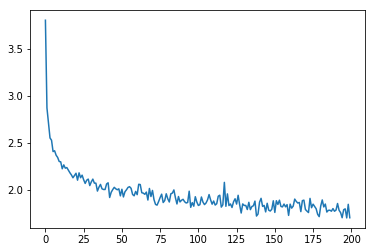

In [86]:
plt.plot(all_losses)

In [87]:
print(evaluate('Wh', 200, temperature=0.8))

Whatter bet to her these engerolk.

KING HENRY VI:
Now pestival be to heart that too resay no dearth
By bidds I are at as so,
By was of and then no speak both Reirak on.

QUEEN LFOY:
God as weer that I 


In [89]:
print(evaluate('Wh', 200, temperature=0.2))

What the prespare the breat to the priends the priend the better the contake the be to my both the priend the presion the breather
The so the conto me the be the priends the better to the breather the b


In [90]:
print(evaluate('Wh', 200, temperature=1.4))

What soed priodred;
WhiWpo'd aly the froyal alposess Ha wife,s
As prelty; haverk riffavinive Ribuse judgin,
their, both, ye she blove.
Fetrches but; ety Phine thee loth?

QUEEN MAM:
Rovever, evine covea
